<a href="https://colab.research.google.com/github/notjaswanth69/lda2/blob/main/lda2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Logistic Regression Model Evaluation:
Accuracy: 0.98
Precision: 0.98
Recall: 0.98
Confusion Matrix:
[[18  0  0]
 [ 1 20  0]
 [ 0  0 15]]


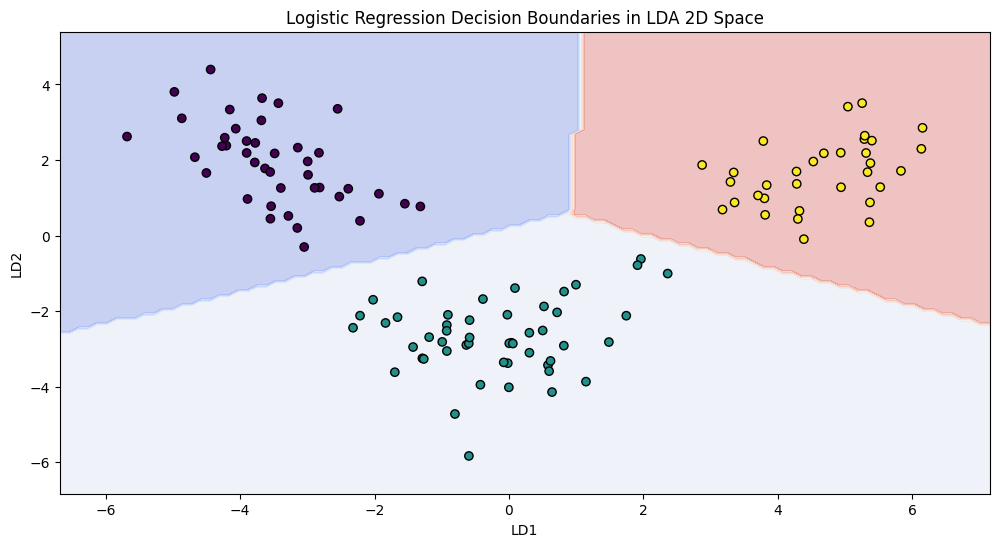

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt

# Load the dataset
wine_data = pd.read_csv('/content/wine.csv')

# Separate features and labels
features = wine_data.drop(columns='Target')
labels = wine_data['Target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42, stratify=labels)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply Linear Discriminant Analysis (LDA)
lda_model = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda_model.fit_transform(X_train_scaled, y_train)
X_test_lda = lda_model.transform(X_test_scaled)

# Train Logistic Regression model
logistic_model = LogisticRegression(max_iter=200)
logistic_model.fit(X_train_lda, y_train)

# Make predictions using the Logistic Regression model
y_pred_logistic = logistic_model.predict(X_test_lda)

# Evaluate the Logistic Regression model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic, average='weighted')
recall_logistic = recall_score(y_test, y_pred_logistic, average='weighted')
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)

print("\nLogistic Regression Model Evaluation:")
print(f"Accuracy: {accuracy_logistic:.2f}")
print(f"Precision: {precision_logistic:.2f}")
print(f"Recall: {recall_logistic:.2f}")
print("Confusion Matrix:")
print(conf_matrix_logistic)

# Create a mesh grid for plotting decision boundaries
xx, yy = np.meshgrid(np.linspace(X_train_lda[:, 0].min() - 1, X_train_lda[:, 0].max() + 1, 100),
                     np.linspace(X_train_lda[:, 1].min() - 1, X_train_lda[:, 1].max() + 1, 100))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Predict on the mesh grid using the trained logistic model
Z_logistic = logistic_model.predict(grid_points)
Z_logistic = Z_logistic.reshape(xx.shape)

# Plotting decision boundaries
plt.figure(figsize=(12, 6))
plt.contourf(xx, yy, Z_logistic, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_train_lda[:, 0], X_train_lda[:, 1], c=y_train, edgecolor='k', marker='o')
plt.title('Logistic Regression Decision Boundaries in LDA 2D Space')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.show()